# <span style="color:royalblue"><center> Medidas de tendencia central</center> </span>
* Media: promedio. Este promedio es susceptible a los valores atípicos. Este e sun inconveniente con ésta medida de tendencia central... Porque debido a que se hace una sumatoria de las medidas del evento o todo el espacio muestral, es sensible con ese número atípico.
* Mediana: dato central. Es el dato que está exactamente en la mitad, siendo un único valor o un valor de los dos datos más centrales, a un lado la misma cantidad de datos que al otro lado. Este valor no es susceptible a los datos atípicos.

1. Datos pares: Tiene que tomarse dos números.

$Sea$ $N = {1,2,3,4}$


$median (N) = 2,3$

2. Datos impares: Tiene que tener un único número.


$Sea$ $N = {1,2,3}$


$median (N) = 2$

* Moda: el dato que más se repite entre todos los datos. Esta medida no aplica para datos numéricos continuos, porque hay problemas del conteo de este tipo de datos.

# *Forma matemática*

### Media = $$ \frac{1}{N} \sum_{i=1}^N x_i  $$ 

### Mediana(impar) = $$ x_{(n+1)/2}^{\text{ordered}} $$

### Mediana(par) = $$ \frac{x_{n/2}^{\text{ordered}} + x_{n/2+1}^{\text{ordered}}}{2} $$

### Moda = $$ x_k $$ donde $$ \text{Freq}(x_k) = \max{(\text{Freq}(x_i))} $$ 

continuamos con el dataset https://www.kaggle.com/lepchenkov/usedcarscatalog

In [3]:
import pandas as pd 

df = pd.read_csv('cars.csv')
df.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7


In [16]:
df.dtypes

manufacturer_name     object
model_name            object
transmission          object
color                 object
odometer_value         int64
year_produced          int64
engine_fuel           object
engine_has_gas          bool
engine_type           object
engine_capacity      float64
body_type             object
has_warranty            bool
state                 object
drivetrain            object
price_usd            float64
is_exchangeable         bool
location_region       object
number_of_photos       int64
up_counter             int64
feature_0               bool
feature_1               bool
feature_2               bool
feature_3               bool
feature_4               bool
feature_5               bool
feature_6               bool
feature_7               bool
feature_8               bool
feature_9               bool
duration_listed        int64
dtype: object

In [11]:
df.describe()

,odometer_value,year_produced,engine_capacity,price_usd,number_of_photos,up_counter,duration_listed
count,38531.000000,38531.000000,38521.000000,38531.000000,38531.000000,38531.000000,38531.000000
mean,248864.638447,2002.943734,2.055161,6639.971021,9.649062,16.306091,80.577249
std,136072.376530,8.065731,0.671178,6428.152018,6.093217,43.286933,112.826569
min,0.000000,1942.000000,0.200000,1.000000,1.000000,1.000000,0.000000
25%,158000.000000,1998.000000,1.600000,2100.000000,5.000000,2.000000,23.000000
50%,250000.000000,2003.000000,2.000000,4800.000000,8.000000,5.000000,59.000000
75%,325000.000000,2009.000000,2.300000,8990.000000,12.000000,16.000000,91.000000
max,1000000.000000,2019.000000,8.000000,50000.000000,86.000000,1861.000000,2232.000000


inspeccionemos el atributo de `price_usd` **(variable numérica continua)** de los autos listados en el dataset:

In [5]:
df['price_usd'].mean()

6639.971021255613

In [8]:
df['odometer_value'].mean()
#df['odometer_value'].median()

248864.6384469648

In [9]:
df['price_usd'].median()

4800.0

<AxesSubplot: ylabel='Frequency'>

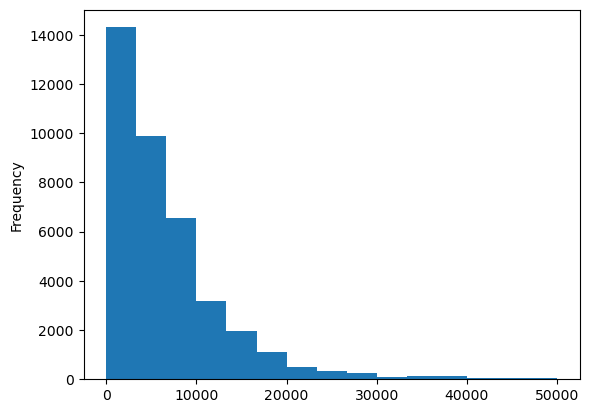

In [10]:
df['price_usd'].plot.hist(bins=15)

resulta más interesante analizar los precios por marcas: 

* **pro tip:** usar seaborn: https://seaborn.pydata.org/tutorial/distributions.html

## $hue$ es la separación en las columnas que yo indique, por ejemplo, por categoría de nombre de fabricante

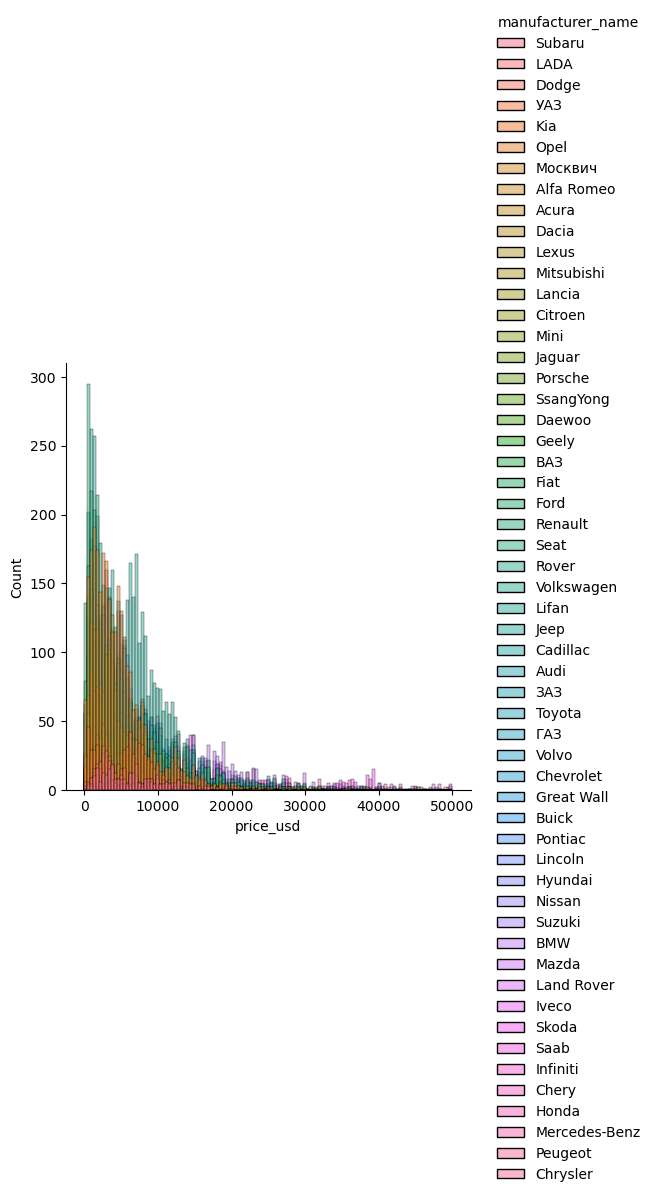

In [5]:
import seaborn as sns
#Distribution plot
sns.displot(df, x = 'price_usd', hue = 'manufacturer_name')

El problema con la visualización anterior es que la tener tantas categorías, se hace difícil analizarlo proque la carga cognitiva que tiene detrás es mucha. Lo mejor, es el zen de Python,donde menos es más. Es más ocnveniente por ejemplo ver las categorías que tienen menos opciones para categorizar todo, como el tipo de motor que poseen.

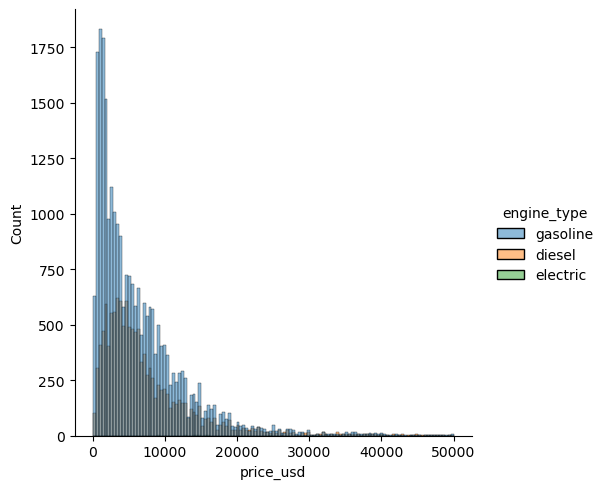

In [6]:
sns.displot(df, x="price_usd", hue="engine_type")

el histograma anterior es muy dificil de analizar, ¿donde están los autos eléctricos?

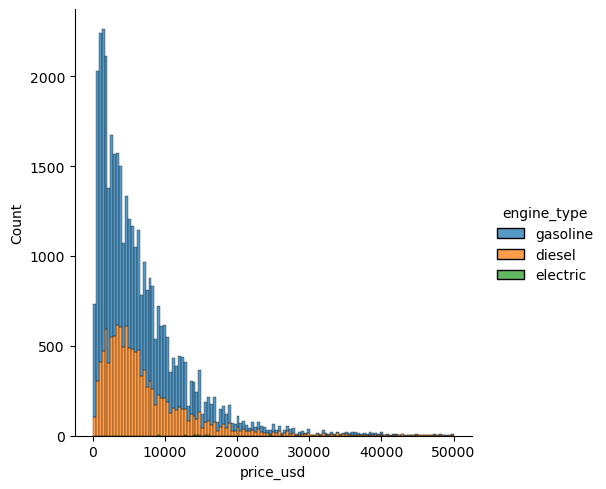

In [7]:
sns.displot(df, x='price_usd', hue = 'engine_type', multiple='stack')

In [8]:
df.groupby('engine_type').count()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_capacity,body_type,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
engine_type,,,,,,,,,,,,,,,,,,,,,
diesel,12874,12874,12874,12874,12874,12874,12874,12874,12874,12874,...,12874,12874,12874,12874,12874,12874,12874,12874,12874,12874
electric,10,10,10,10,10,10,10,10,0,10,...,10,10,10,10,10,10,10,10,10,10
gasoline,25647,25647,25647,25647,25647,25647,25647,25647,25647,25647,...,25647,25647,25647,25647,25647,25647,25647,25647,25647,25647


**RETO:** Inspeccionemos precios de una marca y modelo particular !



<AxesSubplot: xlabel='price_usd', ylabel='Count'>

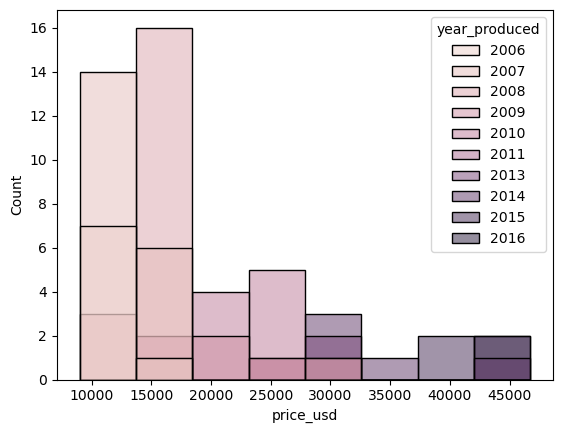

In [9]:
#Filtrar el df original por fabricante Audi y modelo Q7
Q7_df = df[(df['manufacturer_name']=='Audi') & (df['model_name']=='Q7')]
sns.histplot(Q7_df, x='price_usd', hue = 'year_produced')

# Ejercicio: buscando un carro de interés

In [80]:
def carro():
    modelo = str(input('Modelo'))
    for i in df['model_name']:
        if i == modelo:
            print('si está')
            break
carro()

Modelo Koleos


si está


,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
12144,Renault,Koleos,automatic,black,191405,2008,gasoline,False,gasoline,2.5,...,True,False,True,False,True,False,False,True,True,27
12175,Renault,Koleos,mechanical,black,222000,2008,gasoline,False,gasoline,2.5,...,False,False,True,False,False,False,False,True,True,6
12256,Renault,Koleos,automatic,black,11000,2018,gasoline,False,gasoline,2.0,...,True,False,True,False,True,True,True,True,True,79
12487,Renault,Koleos,automatic,red,260000,2008,gasoline,False,gasoline,2.5,...,False,True,True,True,True,False,True,True,True,80
12565,Renault,Koleos,automatic,white,172000,2013,gasoline,False,gasoline,2.5,...,True,True,True,True,True,False,True,True,True,83
12594,Renault,Koleos,mechanical,grey,383045,2008,gasoline,False,gasoline,2.5,...,False,False,False,False,True,False,False,False,False,1
12842,Renault,Koleos,automatic,black,81000,2012,diesel,False,diesel,2.0,...,True,False,True,False,True,False,True,True,True,169
13031,Renault,Koleos,automatic,black,15262,2018,gasoline,False,gasoline,2.5,...,True,False,True,True,True,True,True,True,True,26
13292,Renault,Koleos,mechanical,black,193000,2011,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,True,True,True,12
13737,Renault,Koleos,automatic,black,190000,2008,gasoline,False,gasoline,2.5,...,True,False,True,False,True,False,False,True,True,36


<AxesSubplot: xlabel='price_usd', ylabel='Count'>

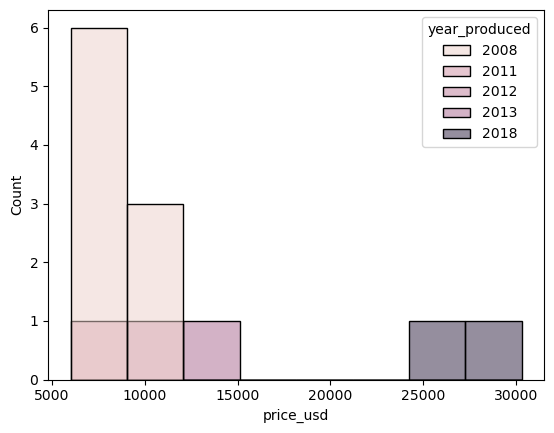

In [81]:
#-
import seaborn as sns
df_sand = df[(df['manufacturer_name'] == 'Renault') & (df['model_name']=='Koleos')]
display(df_sand)
sns.histplot(df_sand, x='price_usd', hue='year_produced')

La estadística descriptiva tiene parte analítica y visual.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3f569948-e9a8-454f-8f4d-a27aa1610a87' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>